### 基于Izhikevich方程的单神经元模拟

这个程序对单神经元采用了Izhikevich方程进行建模，简单来说就是描述了对于任意一种I的输入，神经元轴突输出的膜电位v是怎么样的，以此来构成神经网络的基础。

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Izhikevich模型参数
a = 0.02  # 恢复变量的时间常数
b = 0.2   # 控制恢复变量的影响
c = -65   # 膜电位重置值
d = 8     # 恢复变量重置值
I_ext = 10  # 外部电流刺激强度


下面部分是Izhikevich方程函数，传入电流I，以及更新自身的u，v变量

In [23]:

# Izhikevich模型方程
def izhikevich(v, u, I):
    dvdt = 0.04 * v**2 + 5 * v + 140 - u + I
    dudt = a * (b * v - u)
    return dvdt, dudt


这部分是电流设置，可以设置电流给予的时间窗口，同时电流大小会影响电位是否能够产生动作电位，以及影响冲动发放频率。

In [24]:

I0=10
t_begin=30
t_end=250
# 外部电流的函数形式 (方波电流)
def external_current(t):
    return I0 if t_begin <= t <= t_end else 0


这部分为初始化U,V,I以及调用方程函数，检测膜电位。理论上网络的构建只需要以这一部分和前两部分为基础设置神经元的状态即可

In [25]:

# 初始化参数
v = -70  # 初始膜电位 (mV)
u = b * v  # 初始恢复变量
time_step = 0.1  # 时间步长 (ms)
t_max = 300  # 模拟的总时间 (ms)
t = np.arange(0, t_max, time_step)

# 结果存储
v_values = []
u_values = []
I_values = []

# Izhikevich模型求解
for tt in t:
    I = external_current(tt)  # 获取当前电流刺激
    dvdt, dudt = izhikevich(v, u, I)  # 计算膜电位和恢复变量的变化率
    v += dvdt * time_step  # 更新膜电位
    u += dudt * time_step  # 更新恢复变量
    
    # 检查膜电位是否超过阈值，产生动作电位
    if v >= 30:
        v = c  # 膜电位重置
        u += d  # 恢复变量增加

    # 保存数据
    v_values.append(v)
    u_values.append(u)
    I_values.append(I)


这一部分是绘图

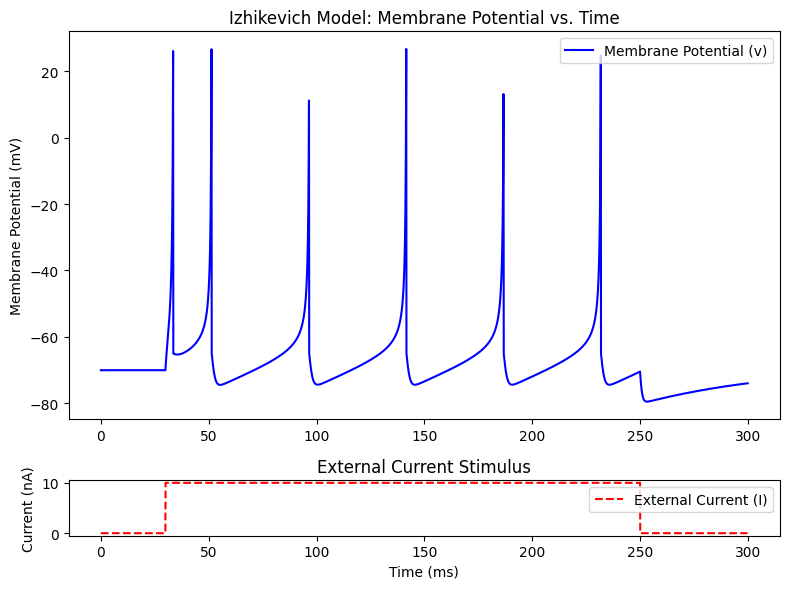

In [26]:

# 创建图形
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[7, 1])  # 图形的高度比例

# 绘制膜电位
ax0 = plt.subplot(gs[0])
ax0.plot(t, v_values, label='Membrane Potential (v)', color='blue')
ax0.set_ylabel('Membrane Potential (mV)')
ax0.set_title('Izhikevich Model: Membrane Potential vs. Time')
ax0.legend(loc="upper right")

# 绘制电流
ax1 = plt.subplot(gs[1])
ax1.plot(t, I_values, label='External Current (I)', color='red', linestyle='--')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Current (nA)')
ax1.set_title('External Current Stimulus')
ax1.legend(loc="upper right")

# 调整图形布局
plt.tight_layout()

# 显示图形
plt.show()
